# **Let's Build a simple Neural Network from Scratch using only Mathematics and Numpy.**

* **Importing the Necessary Libraries.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

* **Generating Random Data to use for our Example.**

In [2]:
#Creating Random Data with Linear Correlation

Samples = 1000
nVariables = 1

xOne = np.random.uniform(-10, 10, Samples*nVariables)
xTwo = np.random.uniform(-10, 10, Samples*nVariables)

#Putting the 2 Inputs into a single Matrix
xInputs = np.column_stack((xOne, xTwo))

print(xInputs.shape)

(1000, 2)


**Let's Define and Create a Random Linear Function for our Targets:**

# $f(x) = w1x1 + w2x2 + b + Noise$

Where:
* w1 = 2 | Arbitrarily Chosen
* w2 = -3 | Arbitrarily Chosen
* b = 5 | Arbitrarily Chosen
* Noise = Random Number Between 0 and 1 | Especially used in Real-World Scenario to Randomize the Data a Bit

Conceptually Speaking, the Algorithm will have to Understand and Know that this is the function we've used for Training the Model and the One it'll use for Predicting Values.


In [3]:
Noise = np.random.uniform(-1, 1, Samples*nVariables)

**Creating the Targets based on the Arbitrarily Chosen Linear Function.**

In [4]:
Targets = 2*xOne -3*xTwo + 5 + Noise

print(Targets.shape)

(1000,)


**Plotting the Data.**

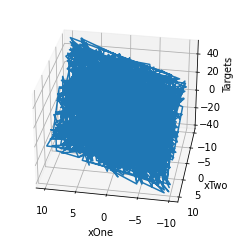

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(xOne, xTwo, Targets)
ax.set_xlabel("xOne")
ax.set_ylabel("xTwo")
ax.set_zlabel("Targets")
ax.view_init(azim = 100)
plt.show()

**Jumping into The Model.**

**Initializing Randomly Weights and Biases from the (-0.1,0.1) Interval.**

In [6]:
InitRange = 0.1

Weights = np.random.uniform(-InitRange, InitRange, size = (2, 1))
Biases = np.random.uniform(-InitRange, InitRange, size = (1, 1))

**Setting a Learning Rate.**

In [7]:
LearningRate = 0.02

**Training the Model.**

In [8]:
#Targets Default Shape is (1000,), while we need a (1000, 1) Shape in order to not get any Error.

Targets.shape
Targets = Targets.reshape(Samples, 1)
#Targets

In [9]:
Iterations = 100

for i in range(Iterations):    
    Outputs = np.dot(xInputs, Weights) + Biases
    #Outputs = np.concatenate(Outputs, axis=0)
    
    Deltas = np.subtract(Outputs, Targets)

    #Average Loss per Observation
    Loss = np.sum(Deltas**2)/2/Samples

    print(Loss)
    
    ScaledDeltas = Deltas/Samples
    
    #Updating Weights and Biases
    Weights = Weights - LearningRate * np.dot(xInputs.T, ScaledDeltas)
    Biases = Biases - LearningRate * np.sum(ScaledDeltas)
    #print(Outputs.shape)

228.35437331342808
39.98530134627502
15.344226295087497
11.768803765105462
10.925227954099581
10.449855373348695
10.03665644532722
9.64542497305563
9.270394313169616
8.910287290686133
8.564430980942655
8.232251126708848
7.913205565244305
7.606774794991647
7.31246001486062
7.029782166774843
6.7582811368970654
6.497515004218592
6.247059320921469
6.00650642146423
5.775464759021037
5.553558268162017
5.34042575273324
5.135720297939407
4.93910870567229
4.750270952165696
4.568899667094318
4.394699633268487
4.227387306110533
4.066690352130617
3.9123472056507658
3.76410664305568
3.6217273738772
3.4849776480469625
3.3536348786779024
3.2274852797606064
3.1063235181848405
2.989952379519814
2.878182447009162
2.7708317932581887
2.667725684111497
2.5686962942390337
2.473582433967573
2.3822292869130433
2.2944881579866414
2.210216231364517
2.129276338027129
2.0515367324898843
1.9768708783616216
1.905157242381927
1.8362790966020175
1.7701243283872
1.7065852579316625
1.6455584629885682
1.5869446105301412

**Let's now Print the Weights and Biases and see if they are Close to the Original ones (w1 = 2 w2 = -3 B = 5):**

In [10]:
print(Weights)
print(Biases)

[[ 1.99515474]
 [-3.00142385]]
[[4.33430475]]


**If they are not very close, is because we've used a Small Learning Rate and fewer Iteractions in the Training Loop than needed, we can eventually re-run the Training Loop or set the Learning Rate a bit higher.**

**Let's Plot the Outputs and the Targets.**

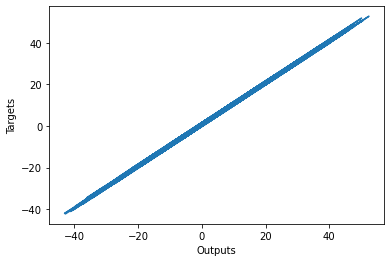

In [11]:
#The Closer to a 45° Line the Closer the Outputs to the Targets.

plt.plot(Outputs, Targets)
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.show()